In [23]:
runlist=list(range(2024, 2034)) # Select cosmic runs
DATASET='rec.mu2e.CRV_wideband_cosmics-noadc.CRVWB-000-008-000.root'

from mu2etools import *
from mu2etools import wideband
from scipy.signal import find_peaks
hep.style.use('ATLAS')  # or ATLAS/LHCb2
from matplotlib import colors


In [24]:
def customFilter(arr):
    #Select only events with PEs>0 in channel 0
    cut = (arr.PEs[:, 0, 0] > 0) & (arr.fitStatus[:, 0, 0] != 2) & (arr.fitStatus[:, 0, 1] != 2)
    arr = arr[cut]
    # Select only first two channels from FEB0 
    arr = arr[:,0,0:2]
    return arr

In [25]:
processor = wideband.DataProcessor(runlist=runlist, userunlist=True, remove=False, fixtimes=False, 
                                   treename='run', filter_name=["PEs", "fitStatus"], filter_func=customFilter)
arr = processor.getData(DATASET) # get akward array for "run" tree

Processing file: rec.mu2e.CRV_wideband_cosmics-noadc.CRVWB-000-008-000.002033_004.root - 100.0% complete

In [40]:
arrPEs = arr.PEs

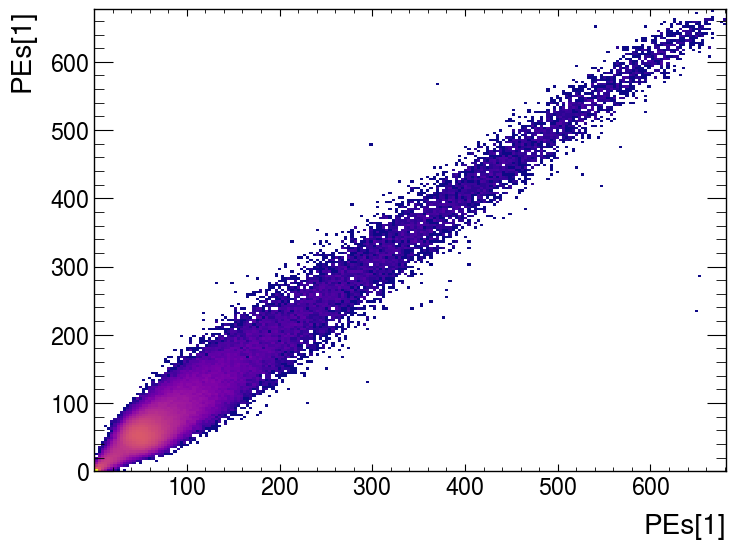

In [41]:
#Histogram 1st vs 2nd channel from FEB0
plt.hist2d(arrPEs[:,0].to_numpy(), arrPEs[:,1].to_numpy(), bins = 200, norm = colors.LogNorm(), cmap ="plasma");plt.xlabel('PEs[0]');
plt.xlabel('PEs[1]');
plt.ylabel('PEs[1]');

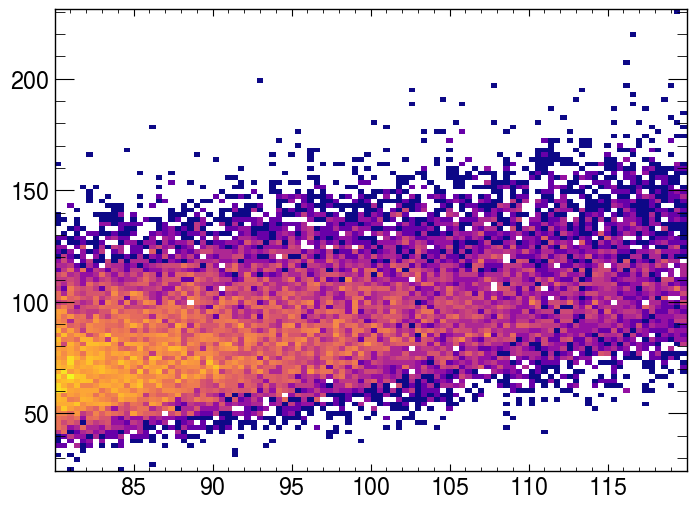

In [42]:
PE0_cut = (arrPEs[:,0]>80) & (arrPEs[:,0]<120)
arrPEs = arrPEs[PE0_cut]
plt.hist2d(arrPEs[:,0].to_numpy(), arrPEs[:,1].to_numpy(), bins = 100, norm = colors.LogNorm(), cmap ="plasma");

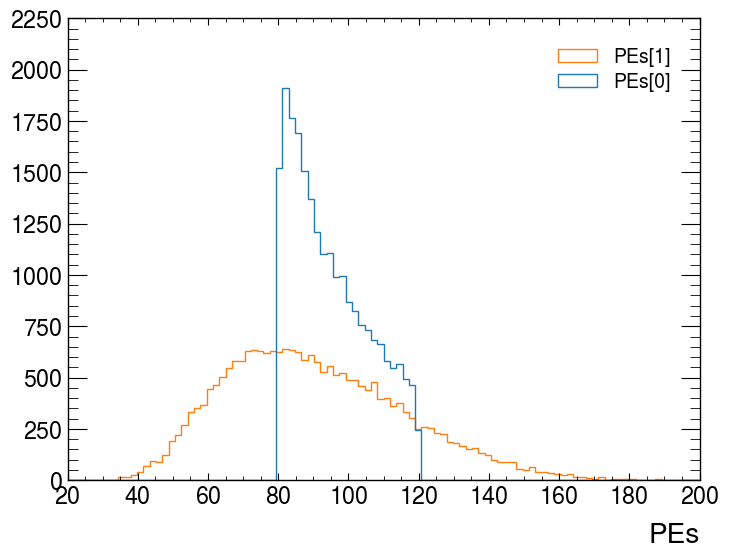

In [34]:
#Histogram channels 0 and 1 from FEB0
plt.hist(arrPEs[:,0:2], histtype='step', range=(20,200), bins=100, label=['PEs[0]', 'PEs[1]']);
plt.xlabel('PEs');
plt.legend();

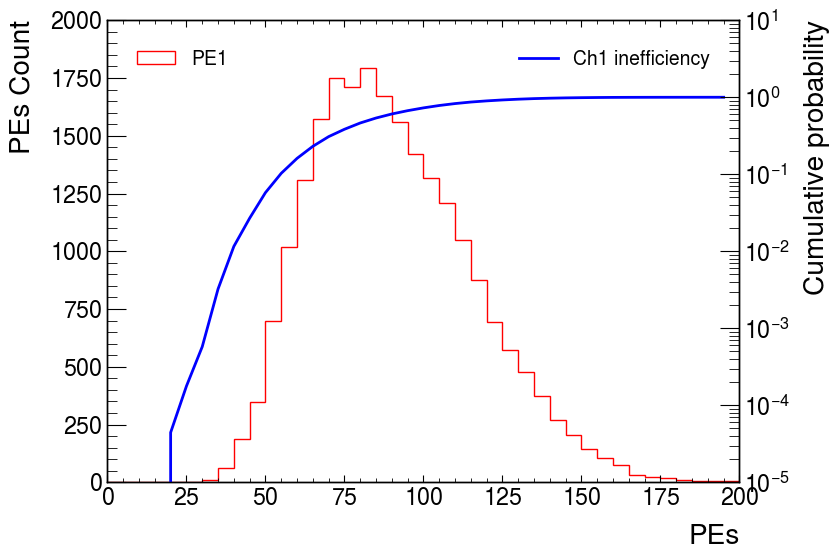

In [35]:
# Remove None values
PE1 = arrPEs[:, 1]
# Histogram PE1
values, bins = np.histogram(PE1.to_numpy(), bins=40, range=(0, 200))
# Evaluate the cumulative
cumulative = np.cumsum(values) / np.sum(values)

fig, ax1 = plt.subplots()
# Plot PE1
ax1.hist(PE1, bins=40, range=(0, 200), histtype='step', color='red', label='PE1')
ax1.set_xlabel('PEs')
ax1.set_ylabel('PEs Count')
ax1.legend(loc='upper left')

# Create a secondary axis for the cumulative plot
ax2 = ax1.twinx()
# Plot the cumulative function. Remove the last bin from x-axis
ax2.plot(bins[:-1], cumulative, c='blue', label='Ch1 inefficiency')
ax2.set_ylabel('Cumulative probability')
ax2.set_yscale('log')
ax2.legend(loc='upper right');